# Loan Repayment Assessment in Banking

You are required to build and train a model that identifies a customer will repay or default from the loan dataset. This dataset is included in loan data and provides a challenging classifier. Task is to build this model based on the details in this document and submit.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the training dataset
train_loan_data = pd.read_csv(r"C:\Users\Zimm\Desktop\Data Scientist - Hackathon\train_loan_data (1).csv")

# Load the testing dataset
test_loan_data = pd.read_csv(r"C:\Users\Zimm\Desktop\Data Scientist - Hackathon\test_loan_data (1).csv")

In [3]:
# Display basic information about the training dataset
print("Basic Information about the Training Dataset:")
print(train_loan_data.info())

Basic Information about the Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77

In [4]:
# Display basic information about the testing dataset
print("\nBasic Information about the Testing Dataset:")
print(test_loan_data.info())



Basic Information about the Testing Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            20000 non-null  object 
 1   annual_inc            20000 non-null  float64
 2   earliest_cr_line      20000 non-null  object 
 3   emp_length            18742 non-null  object 
 4   emp_title             18622 non-null  object 
 5   fico_range_high       20000 non-null  float64
 6   fico_range_low        20000 non-null  float64
 7   grade                 20000 non-null  object 
 8   home_ownership        20000 non-null  object 
 9   application_type      20000 non-null  object 
 10  initial_list_status   20000 non-null  object 
 11  int_rate              20000 non-null  float64
 12  loan_amnt             20000 non-null  float64
 13  num_actv_bc_tl        18989 non-null  float64
 14  mort_acc              19

In [5]:
# Summary statistics for numerical columns in the training dataset
print("\nSummary Statistics for Numerical Columns in the Training Dataset:")
display(train_loan_data.describe())


Summary Statistics for Numerical Columns in the Training Dataset:


,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [6]:
# Summary statistics for numerical columns in the testing dataset
print("\nSummary Statistics for Numerical Columns in the Testing Dataset:")
display(test_loan_data.describe())


Summary Statistics for Numerical Columns in the Testing Dataset:


,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.00000,18989.000000,19296.000000,1.898900e+04,20000.000000,20000.000000,19989.000000,20000.00000,19987.000000,20000.000000
mean,7.649765e+04,700.204400,696.204250,13.259451,14426.67125,3.617410,1.669310,1.412009e+05,11.593450,0.208000,0.130722,16181.77750,51.709746,25.022300
std,8.568097e+04,31.768558,31.767853,4.772028,8811.38736,2.220795,1.981554,1.558483e+05,5.507847,0.568816,0.374106,21917.28208,24.509718,12.098794
min,0.000000e+00,664.000000,660.000000,5.310000,1000.00000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000
25%,4.500000e+04,674.000000,670.000000,9.750000,7800.00000,2.000000,0.000000,2.959600e+04,8.000000,0.000000,0.000000,5803.75000,33.200000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.790000,12000.00000,3.000000,1.000000,8.070700e+04,11.000000,0.000000,0.000000,11051.50000,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,16.020000,20000.00000,5.000000,3.000000,2.102150e+05,14.000000,0.000000,0.000000,19876.25000,70.600000,32.000000
max,9.522972e+06,850.000000,845.000000,30.990000,40000.00000,20.000000,19.000000,2.210119e+06,56.000000,15.000000,8.000000,921464.00000,127.600000,107.000000


In [7]:
# Summary statistics for categorical columns in the training dataset
print("\nSummary Statistics for Categorical Columns in the Training Dataset:")
print(train_loan_data.describe(include=['object']))


Summary Statistics for Categorical Columns in the Training Dataset:
       addr_state earliest_cr_line emp_length emp_title  grade home_ownership  \
count       80000            80000      75412     74982  80000          80000   
unique         51              640         11     36661      7              6   
top            CA           Sep-03  10+ years   Teacher      B       MORTGAGE   
freq        11744              547      26278      1278  23502          39628   

       application_type initial_list_status             purpose sub_grade  \
count             80000               80000               80000     80000   
unique                2                   2                  14        35   
top          Individual                   w  debt_consolidation        C1   
freq              78446               46745               46418      4982   

              term               title verification_status loan_status  
count        80000               79030               80000       8

In [8]:
# Summary statistics for categorical columns in the testing dataset
print("\nSummary Statistics for Categorical Columns in the Testing Dataset:")
print(test_loan_data.describe(include=['object']))


Summary Statistics for Categorical Columns in the Testing Dataset:
       addr_state earliest_cr_line emp_length emp_title  grade home_ownership  \
count       20000            20000      18742     18622  20000          20000   
unique         50              568         11     11180      7              4   
top            CA         Oct-2001  10+ years   Teacher      B       MORTGAGE   
freq         2865              160       6579       357   5756           9900   

       application_type initial_list_status             purpose sub_grade  \
count             20000               20000               20000     20000   
unique                2                   2                  14        35   
top          Individual                   w  debt_consolidation        C1   
freq              19610               11582               11611      1294   

              term               title verification_status  
count        20000               19753               20000  
unique           2

In [9]:
train_loan_data.info

<bound method DataFrame.info of       addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2      

In [10]:
test_loan_data.info

<bound method DataFrame.info of       addr_state  annual_inc earliest_cr_line emp_length  \
0             MO     50000.0         May-2012     1 year   
1             HI     92000.0         Dec-2001  10+ years   
2             TX     89000.0         Mar-1989  10+ years   
3             CA     33000.0         Nov-2004    9 years   
4             MI     35580.0         Feb-1997        NaN   
...          ...         ...              ...        ...   
19995         MO     38500.0         Sep-2010    4 years   
19996         VA     80000.0         Dec-1998    3 years   
19997         TX     95000.0         May-1996  10+ years   
19998         FL     35000.0         Mar-2003  10+ years   
19999         FL     30700.0         Apr-1994   < 1 year   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician            719.0           715.0   
1                             Supervisor            684.0           680.0   
2               

# Treating Missing Values

In [11]:
# Count of missing values in each column for the training dataset
print("\nCount of Missing Values in Each Column for the Training Dataset:")
print(train_loan_data.isnull().sum())


Count of Missing Values in Each Column for the Training Dataset:
addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64


In [12]:
# Count of missing values in each column for the testing dataset
print("\nCount of Missing Values in Each Column for the Testing Dataset:")
print(test_loan_data.isnull().sum())


Count of Missing Values in Each Column for the Testing Dataset:
addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              1258
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
dtype: int64


In [13]:
# Calculate the percentage of missing values in each column
missing_percentage = train_loan_data.isnull().mean() * 100

# Filter out columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]

# Sort columns by percentage of missing values
sorted_columns = columns_with_missing_values.sort_values(ascending=False)

# Display the sorted columns
print("Columns with Missing Values (sorted by percentage):")
print(sorted_columns)


Columns with Missing Values (sorted by percentage):
emp_title               6.27250
emp_length              5.73500
num_actv_bc_tl          4.93500
tot_cur_bal             4.93500
mort_acc                3.46375
title                   1.21250
revol_util              0.06625
pub_rec_bankruptcies    0.03875
dtype: float64


In [14]:
# Fill missing values for 'emp_title' and 'title' with 'Unknown'
train_loan_data['emp_title'].fillna('Unknown', inplace=True)
train_loan_data['title'].fillna('Unknown', inplace=True)


In [15]:
# Impute the median for numerical columns with missing values
for column in ['num_actv_bc_tl', 'tot_cur_bal', 'mort_acc', 'revol_util', 'pub_rec_bankruptcies']:
    median_value = train_loan_data[column].median()
    train_loan_data[column].fillna(median_value, inplace=True)

In [16]:
# Calculate the mode of 'emp_length'
emp_length_mode = train_loan_data['emp_length'].mode()[0]

# Impute the mode for 'emp_length'
train_loan_data['emp_length'].fillna(emp_length_mode, inplace=True)

In [17]:
# Check for any missing values left
missing_values = train_loan_data.isnull().sum()

# Display columns with missing values left, if any
print("Columns with Missing Values:")
print(missing_values)


Columns with Missing Values:
addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64


In [18]:
# Correlation matrix for numerical columns
print("\nCorrelation Matrix for Numerical Columns:")
print(train_loan_data.corr())


Correlation Matrix for Numerical Columns:
                      annual_inc  fico_range_high  fico_range_low  int_rate  \
annual_inc              1.000000         0.064655        0.064655 -0.069414   
fico_range_high         0.064655         1.000000        1.000000 -0.402389   
fico_range_low          0.064655         1.000000        1.000000 -0.402393   
int_rate               -0.069414        -0.402389       -0.402393  1.000000   
loan_amnt               0.319863         0.099921        0.099921  0.144910   
num_actv_bc_tl          0.106700        -0.110744       -0.110745  0.021043   
mort_acc                0.218238         0.082984        0.082983 -0.074473   
tot_cur_bal             0.427250         0.120926        0.120927 -0.082334   
open_acc                0.134215         0.014905        0.014905 -0.004795   
pub_rec                -0.008990        -0.204863       -0.204866  0.055351   
pub_rec_bankruptcies   -0.045211        -0.204738       -0.204741  0.060385   
revol_bal

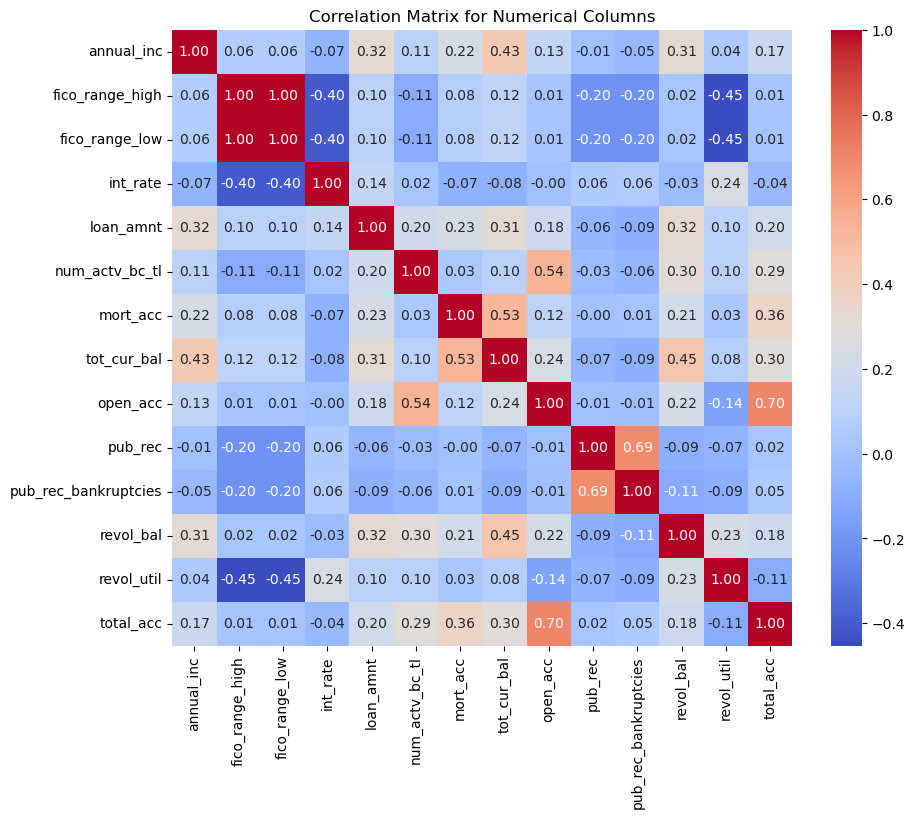

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = train_loan_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


In [20]:
# Distribution of the target variable
print("\nDistribution of the Target Variable:")
print(train_loan_data['loan_status'].value_counts())


Distribution of the Target Variable:
Paid         64030
Defaulted    15970
Name: loan_status, dtype: int64


In [21]:
# Distribution of the target variable in percentage
target_variable_distribution = train_loan_data['loan_status'].value_counts(normalize=True) * 100
print("\nDistribution of the Target Variable:")
print(target_variable_distribution)


Distribution of the Target Variable:
Paid         80.0375
Defaulted    19.9625
Name: loan_status, dtype: float64


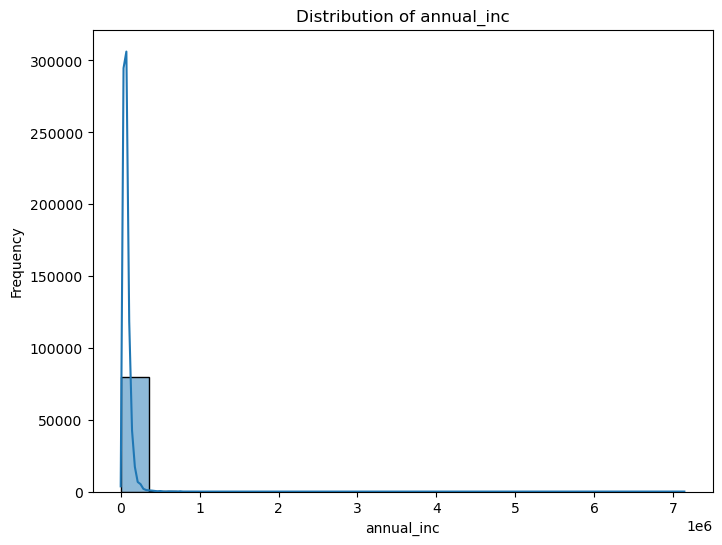

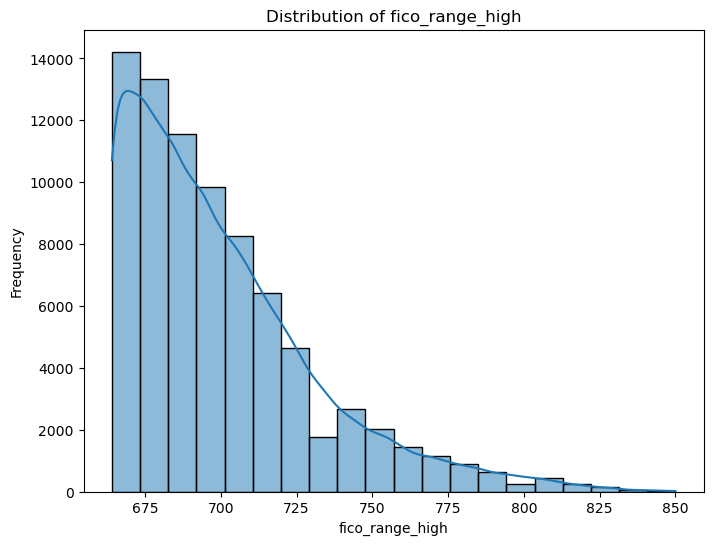

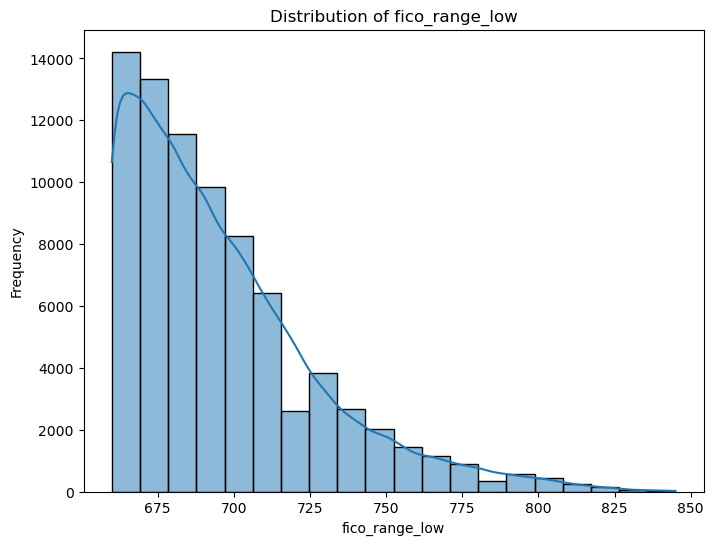

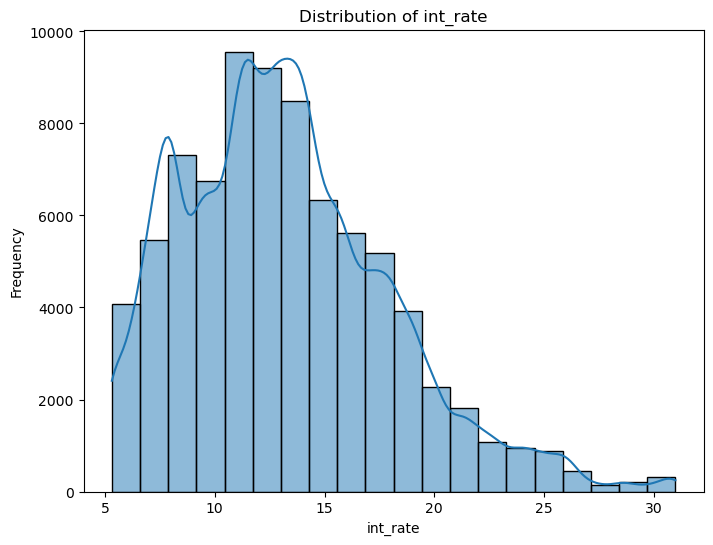

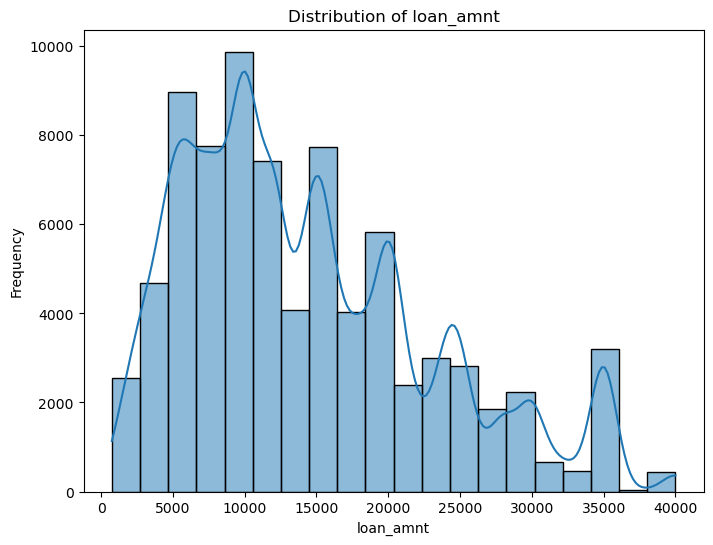

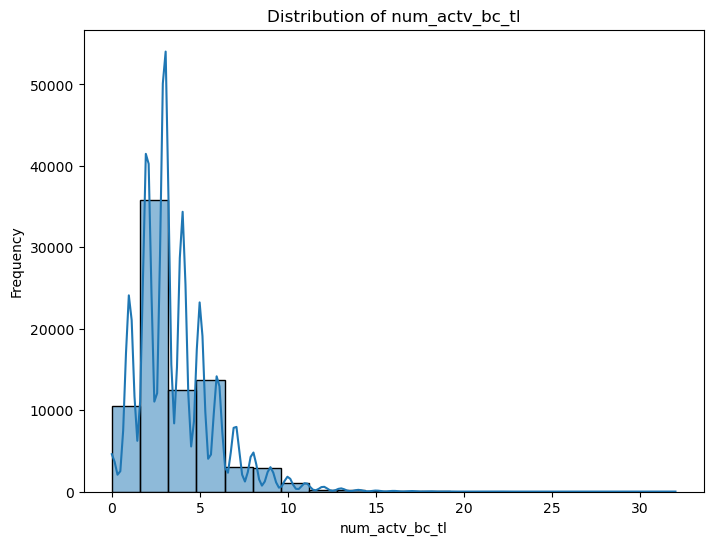

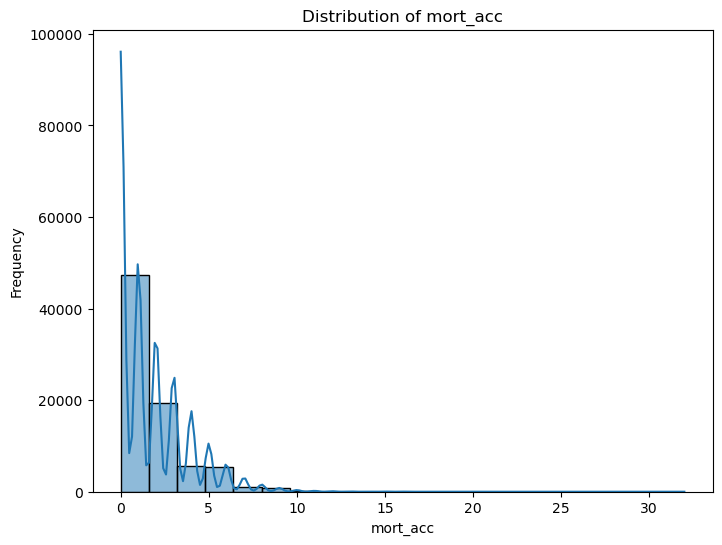

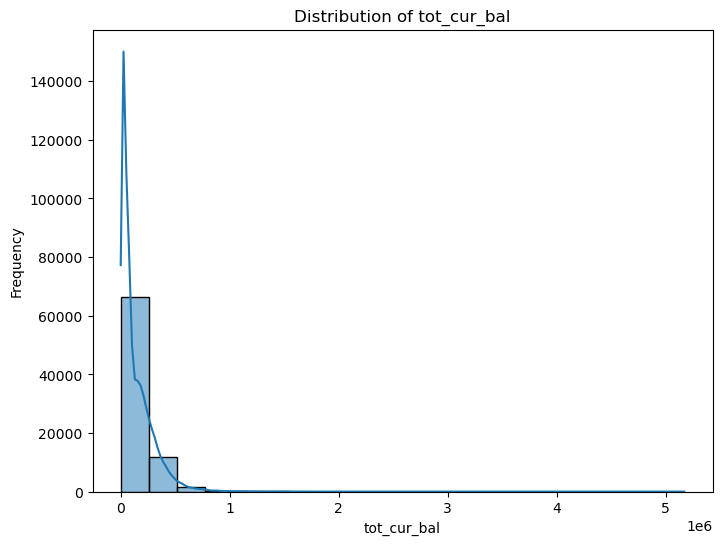

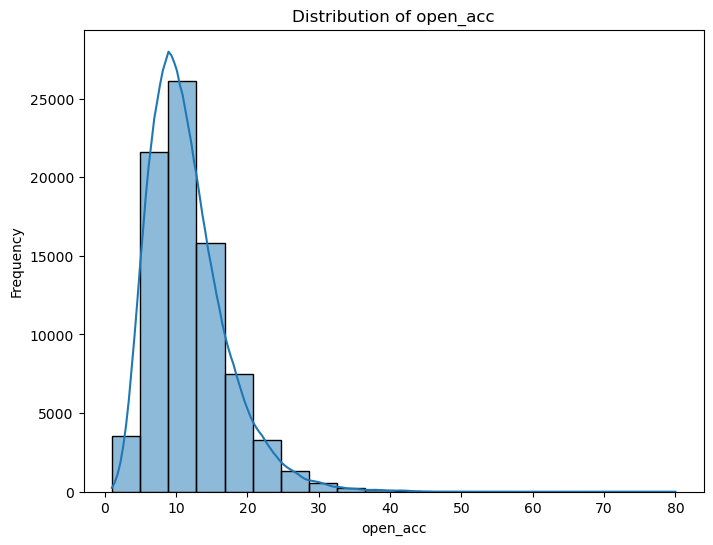

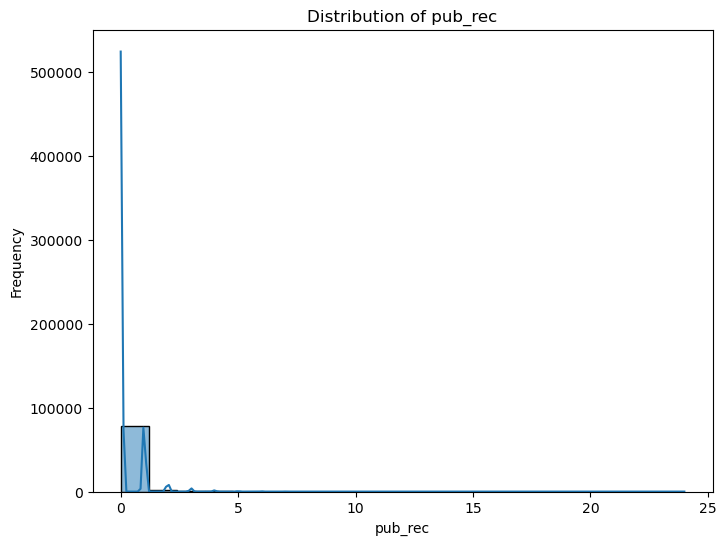

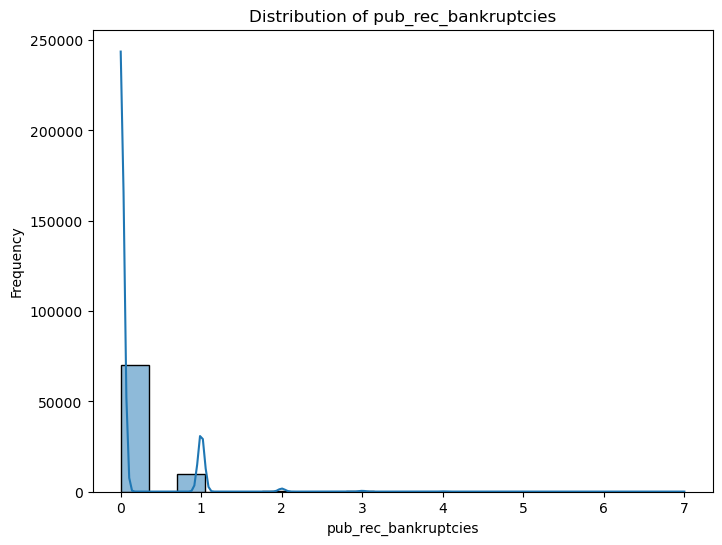

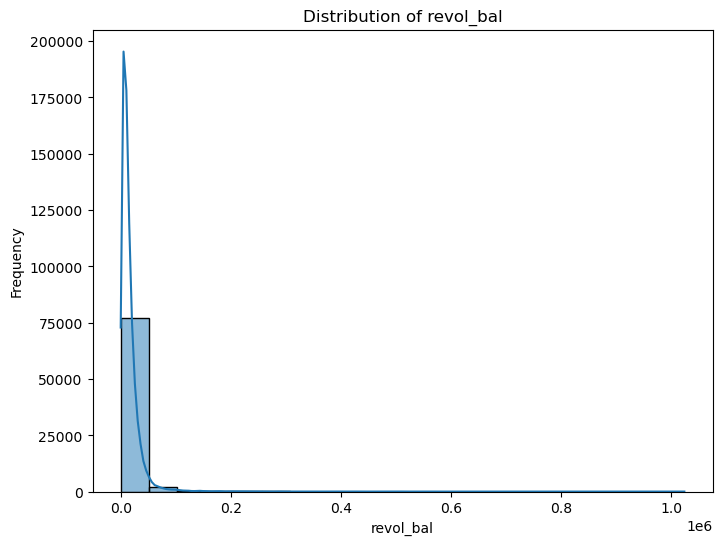

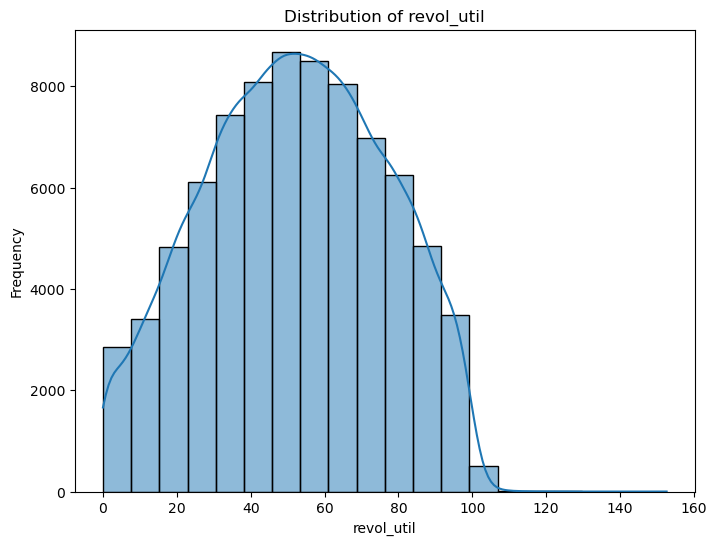

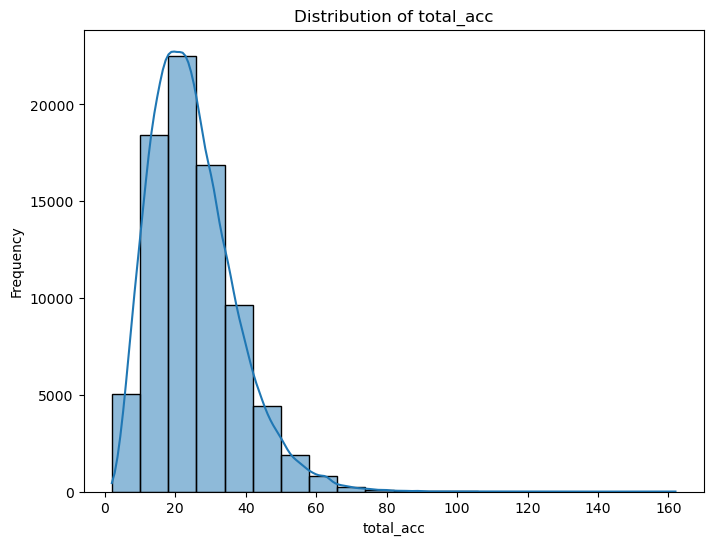

In [22]:
# Visualizing the distribution of numerical features
numerical_features = train_loan_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_loan_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

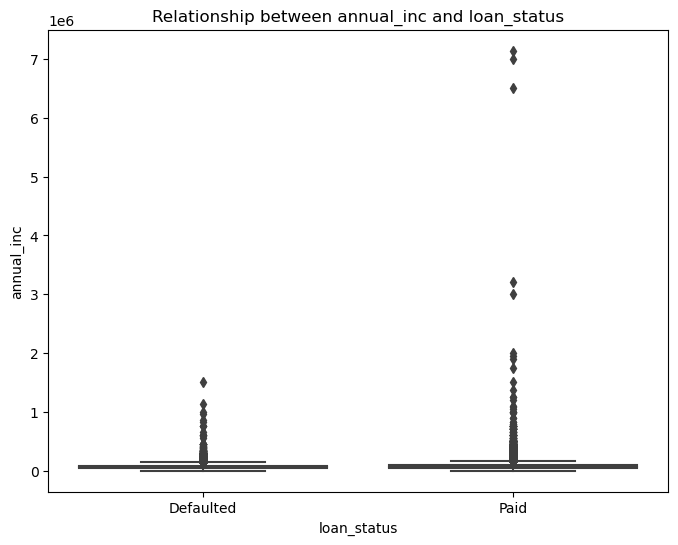

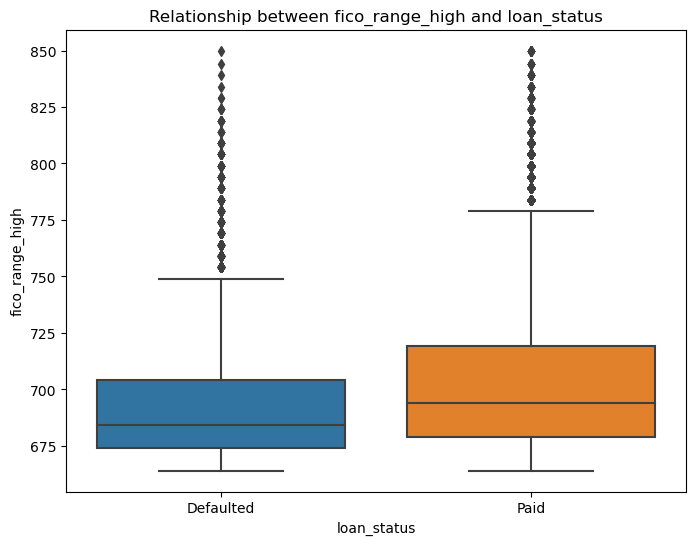

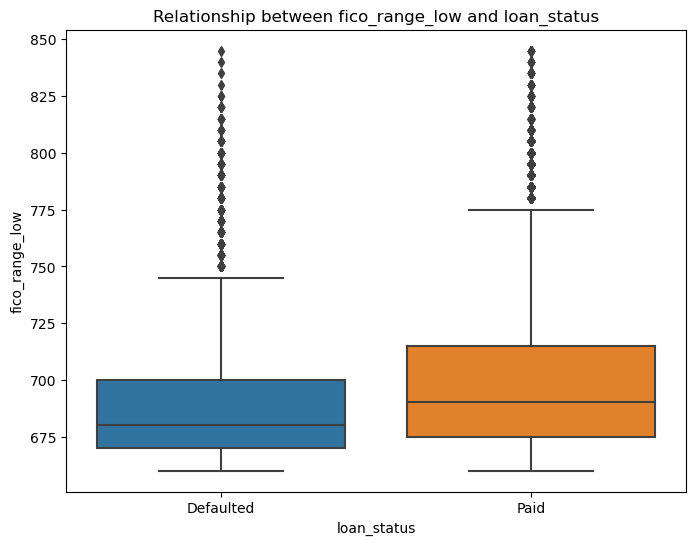

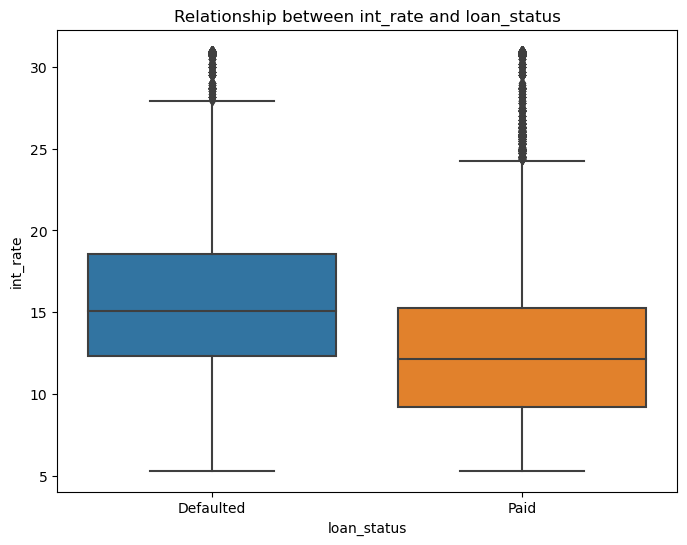

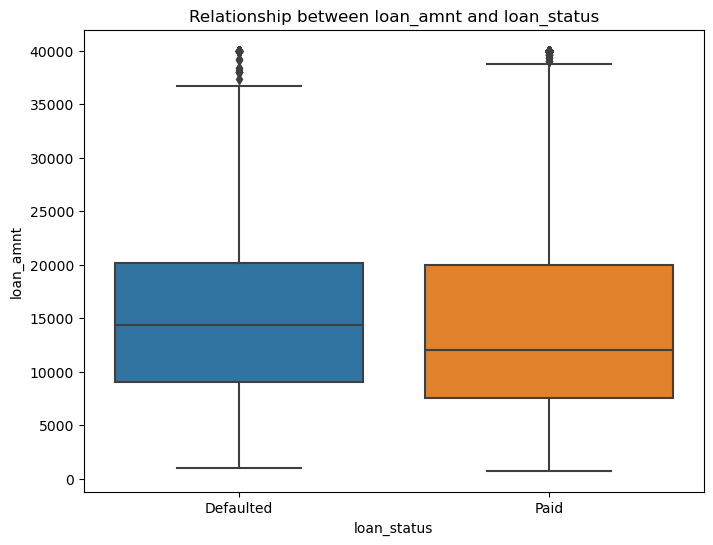

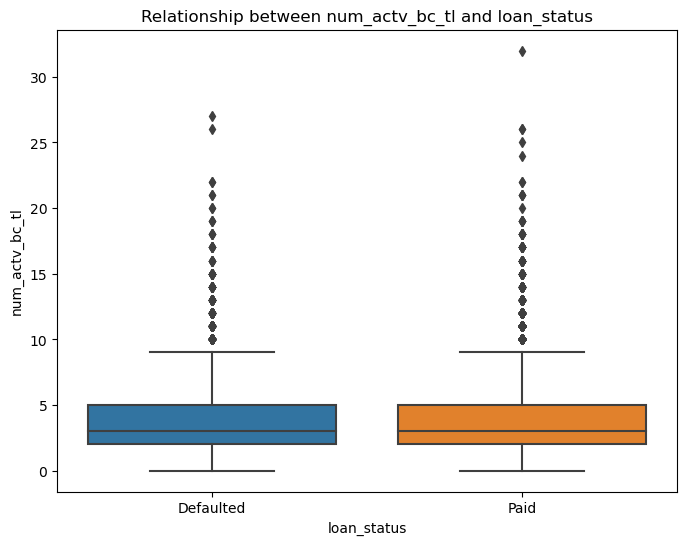

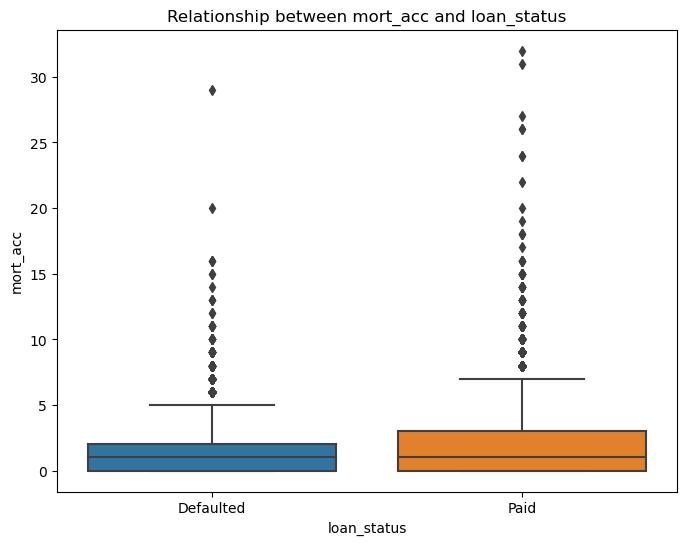

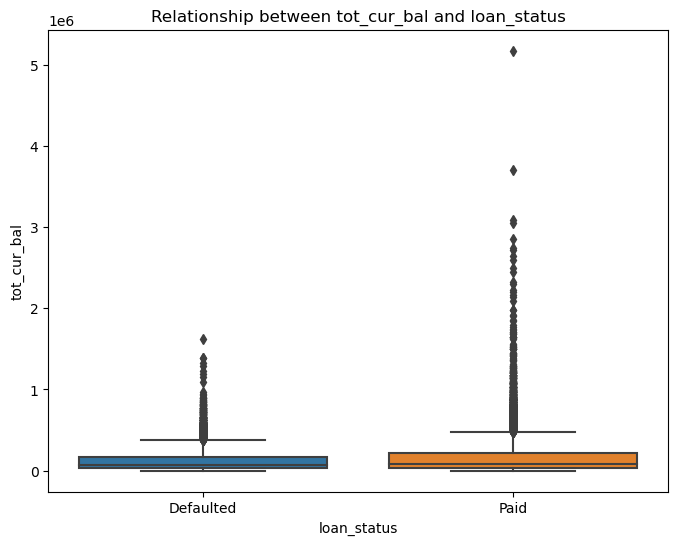

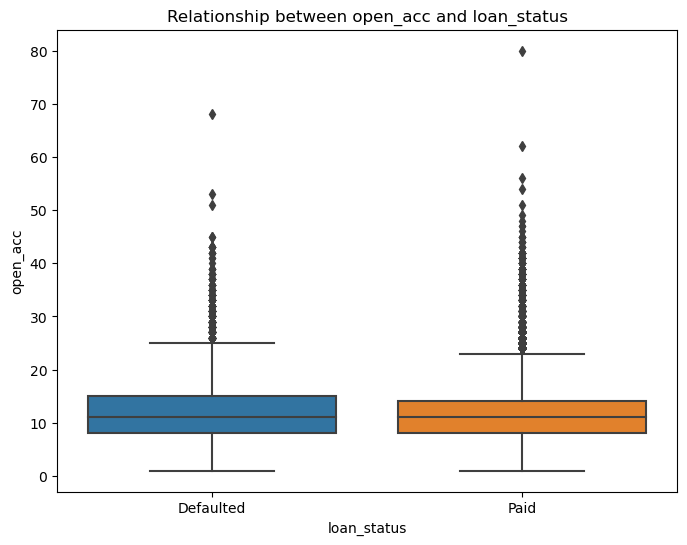

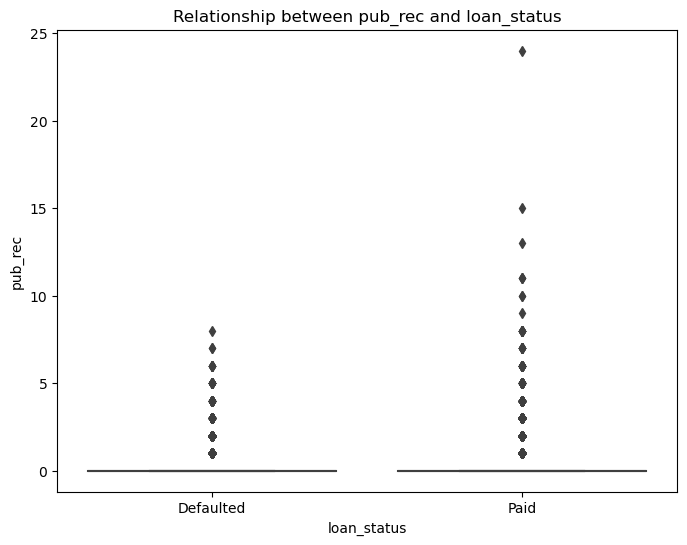

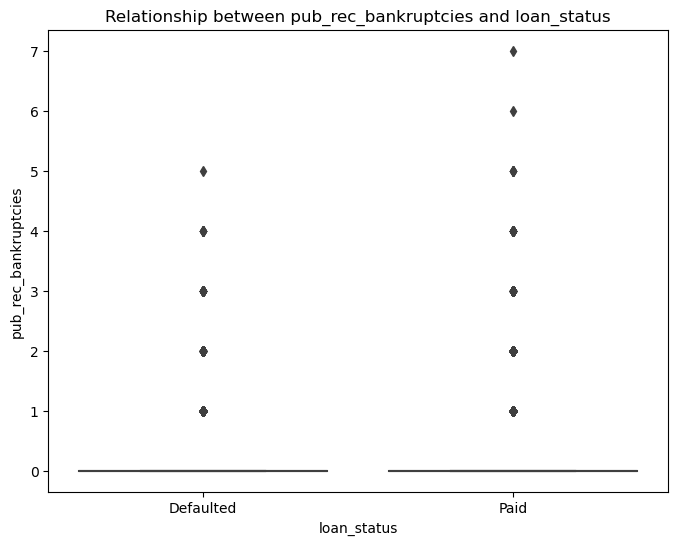

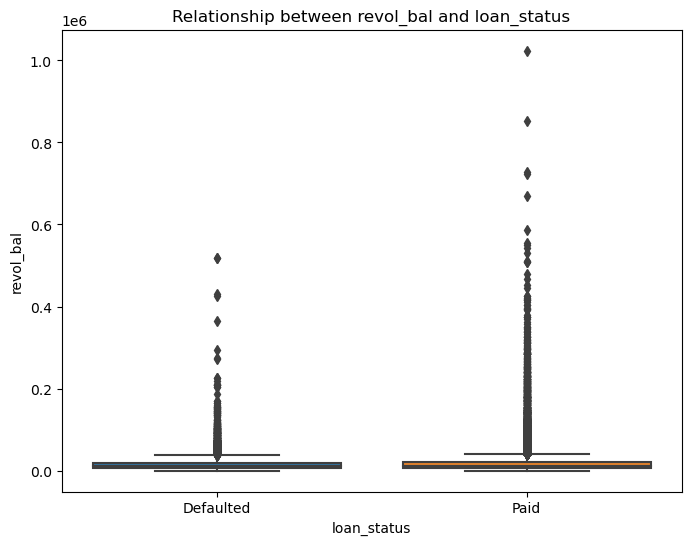

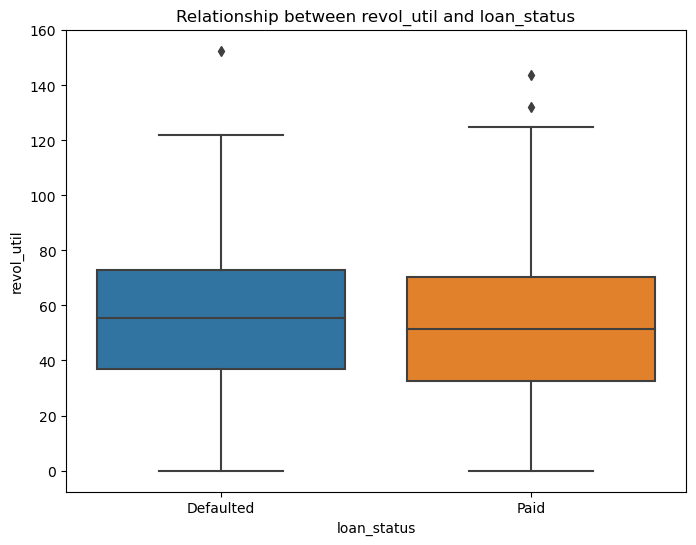

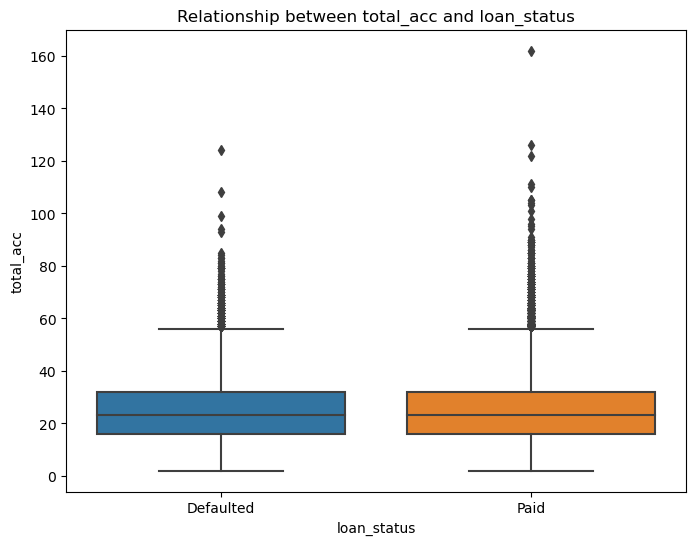

In [23]:
# Visualizing the relationship between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_status', y=feature, data=train_loan_data)
    plt.title(f'Relationship between {feature} and loan_status')
    plt.xlabel('loan_status')
    plt.ylabel(feature)
    plt.show()

# Handling the outliers

In [24]:
# Define a function to identify outliers using the IQR method
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound))
    return outliers, lower_bound, upper_bound


In [25]:
# Identify outliers for 'annual_inc', 'loan_amnt', and 'int_rate'
outliers_annual_inc, lb_annual_inc, ub_annual_inc = identify_outliers(train_loan_data['annual_inc'])
outliers_loan_amnt, lb_loan_amnt, ub_loan_amnt = identify_outliers(train_loan_data['loan_amnt'])
outliers_int_rate, lb_int_rate, ub_int_rate = identify_outliers(train_loan_data['int_rate'])

In [26]:
# Count the number of outliers in these columns
outliers_counts = {
    'annual_inc': outliers_annual_inc.sum(),
    'loan_amnt': outliers_loan_amnt.sum(),
    'int_rate': outliers_int_rate.sum()
}

print(outliers_counts)

{'annual_inc': 3896, 'loan_amnt': 431, 'int_rate': 1497}


# Feature Engineering

Creating new features for data analyzing and imputing

In [27]:
# Create the new feature income to loan ratio
train_loan_data['income_to_loan_ratio'] = train_loan_data['annual_inc'] / train_loan_data['loan_amnt']

# Display the first few rows of the dataset with the new feature
print("Dataset with income_to_loan_ratio feature:")
print(train_loan_data.head())

Dataset with income_to_loan_ratio feature:
  addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ...             purpose  revol_bal  \
0       MORTGAGE       Individual  ...  debt_consolidation       5338   
1           RENT 

In [28]:
from datetime import datetime
current_date = datetime.now()

# Convert 'earliest_cr_line' to datetime format
train_loan_data['earliest_cr_line'] = pd.to_datetime(train_loan_data['earliest_cr_line'], format='%b-%y')

# Handle potential issue with two-digit year parsing by setting a cutoff for years interpreted as future dates
train_loan_data['earliest_cr_line'] = train_loan_data['earliest_cr_line'].apply(lambda x: x if x < current_date else x.replace(year=x.year-100))

# Display the first few rows of the dataset with the new feature
print("Dataset with earliest_cr_line:")
print(train_loan_data.head())

Dataset with earliest_cr_line:
  addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0       1997-07-01  10+ years   
1         CA     40000.0       1987-04-01  10+ years   
2         FL     60000.0       2007-08-01  10+ years   
3         IL    100742.0       1980-09-01  10+ years   
4         MD     80000.0       1999-07-01  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ...             purpose  revol_bal  \
0       MORTGAGE       Individual  ...  debt_consolidation       5338   
1           RENT       Indivi

In [29]:
# Calculate Credit History Length in years
train_loan_data['credit_history_length'] = (current_date - train_loan_data['earliest_cr_line']).dt.days / 365.25

# Display the first few rows of the dataset with the new feature
print("Dataset with credit history length feature:")
(train_loan_data.head())

Dataset with credit history length feature:


,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status,income_to_loan_ratio,credit_history_length
0,CO,85000.0,1997-07-01,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted,4.702628,26.770705
1,CA,40000.0,1987-04-01,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid,4.545455,37.021218
2,FL,60000.0,2007-08-01,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid,3.333333,16.687201
3,IL,100742.0,1980-09-01,10+ years,printer,664,660,B,MORTGAGE,Individual,...,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid,5.037100,43.600274
4,MD,80000.0,1999-07-01,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid,2.285714,24.772074


In [30]:
# Calculate FICO score average
train_loan_data['fico_score_average'] = (train_loan_data['fico_range_high'] + train_loan_data['fico_range_low']) / 2

# Display the first few rows of the dataset with the new feature
print("Dataset with fico_score_average feature:")
print(train_loan_data.head())

Dataset with fico_score_average feature:
  addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0       1997-07-01  10+ years   
1         CA     40000.0       1987-04-01  10+ years   
2         FL     60000.0       2007-08-01  10+ years   
3         IL    100742.0       1980-09-01  10+ years   
4         MD     80000.0       1999-07-01  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ... revol_util  sub_grade        term  \
0       MORTGAGE       Individual  ...       93.6         E1   60 months   
1           R

In [31]:
# Define the list of features to be included in the model
features = [
    'annual_inc', 'loan_amnt', 'int_rate', 
    'income_to_loan_ratio', 'fico_score_average',  'credit_history_length'
]
    

In [32]:
# Define the target variable according to data
target = 'loan_status'

In [33]:
# Now, let's prepare the data with one-hot encoding for 'home_ownership' and any other categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder for categorical variables
categorical_features = ['home_ownership']  # Add other categorical features to this list
one_hot_encoder = OneHotEncoder()

# Create a Column Transformer to apply encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough' 
)

In [34]:
features = ['annual_inc', 'loan_amnt', 'income_to_loan_ratio', 'fico_score_average', 'credit_history_length']

# Prepare a DataFrame with the selected features and target for transformation
data_for_transformation = train_loan_data[features + categorical_features + [target]]

In [35]:
# Separate the features and target variable
X = data_for_transformation.drop(target, axis=1)
y = data_for_transformation[target]

In [36]:
# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split

# Split the transformed features and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=78)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the model
model = LogisticRegression(max_iter=500)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [39]:
# Predictions on the testing set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [40]:
# Print the model
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

   Defaulted       0.00      0.00      0.00      3148
        Paid       0.80      1.00      0.89     12852

    accuracy                           0.80     16000
   macro avg       0.40      0.50      0.45     16000
weighted avg       0.65      0.80      0.72     16000

AUC-ROC: 0.6102987273548415


Precision: Precision measures the accuracy of the positive class predictions. In this case, for the "Paid" class, the precision is 0.80, indicating that when the model predicts a loan to be "Paid," it is correct 80% of the time.

Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances. For the "Paid" class, the recall is 1.00, indicating that the model correctly identifies all instances of "Paid" loans.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For the "Paid" class, the F1-score is 0.89.

Support: Support indicates the number of actual occurrences of each class in the test dataset. In this case, there are 3148 instances of "Defaulted" loans and 12852 instances of "Paid" loans.

Accuracy: Accuracy measures the overall correctness of the model across all classes. The accuracy is 0.80, indicating that the model correctly predicts the loan status for 80% of the instances.

Macro Avg: The macro average calculates the metric independently for each class and then takes the average. In this case, the macro average for precision, recall, and F1-score is shown.

Weighted Avg: The weighted average calculates the metric for each class and takes the weighted average based on support (the number of true instances for each class). In this case, the weighted average for precision, recall, and F1-score is shown.

AUC-ROC: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) is a measure of the model's ability to distinguish between classes. It quantifies the model's performance across various threshold settings. In this case, the AUC-ROC value is 0.6103, indicating moderate discriminative power.

While the model shows promise in predicting "Paid" loans, it requires refinement to better handle "Defaulted" loans and improve overall performance. Further exploration, feature engineering, and model tuning may help enhance the model's predictive capabilities

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=78)

In [43]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=78)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [44]:
# Random ForestC lassifier on the balanced dataset
model_rf = RandomForestClassifier(random_state=78)
model_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=78)

In [45]:
# Evaluating the models
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]

In [46]:

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

   Defaulted       0.27      0.16      0.20      3148
        Paid       0.81      0.90      0.85     12852

    accuracy                           0.75     16000
   macro avg       0.54      0.53      0.53     16000
weighted avg       0.71      0.75      0.72     16000

AUC-ROC: 0.5786295899836709


# Tune Model Parameters with GridsearchCV

In [47]:
(train_loan_data.columns)

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status', 'income_to_loan_ratio', 'credit_history_length',
       'fico_score_average'],
      dtype='object')

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 10, 20],          # Maximum depth of the trees

}

In [50]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=78, class_weight='balanced')

In [51]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

In [52]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=78),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [53]:
# Best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [54]:
print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.6421359194785491


In [55]:
# Convert categorical target variable to binary format
y_test_binary = (y_test == 'Defaulted').astype(int)


In [56]:
from sklearn.metrics import precision_recall_curve

# Assuming y_pred contains the predicted probabilities or binary predictions for the positive class

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba)


In [57]:
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba)

# Print precision, recall, and thresholds
print("Precision:", precision)
print("Recall:", recall)
print("Thresholds:", thresholds)

Precision: [0.19675    0.1967623  0.19667417 0.19668646 0.19671106 0.19667313
 0.19663519 0.19663413 0.19668335 0.19659511 0.19654265 0.19635361
 0.19617555 0.19614854 0.19599473 0.19586657 0.19587888 0.19586268
 0.19563027 0.19552615 0.19557126 0.19549299 0.19550533 0.19536089
 0.19525316 0.19510804 0.19512041 0.19509561 0.19504447 0.19508781
 0.19497897 0.19510949 0.19512663 0.19492503 0.19493752 0.19495001
 0.19475848 0.19460538 0.19437093 0.19416408 0.19411194 0.1941245
 0.19405311 0.19386958 0.1938822  0.19333769 0.19277661 0.19216848
 0.1918397  0.19185239 0.1913055  0.19131822 0.19111556 0.19038022
 0.1904058  0.1904186  0.19043139 0.1897904  0.1894429  0.18894135
 0.18829692 0.18824097 0.18825395 0.18826692 0.18821096 0.18822394
 0.18823692 0.18812088 0.18789787 0.18791101 0.18792416 0.1870686
 0.18708178 0.18589789 0.18581977 0.18523344 0.18517446 0.18518787
 0.18493852 0.18487887 0.18428846 0.18430211 0.18431576 0.1837485
 0.18368725 0.18362599 0.18372305 0.183737   0.1824755

Setting a threshold is necessary when you want to make predictions based on the predicted probabilities. The predicted probabilities returned by the model represent the likelihood of a sample belonging to the positive class.

By setting a threshold, you can decide how confident the model needs to be in order to classify a sample as positive. For example, if the threshold is set to 0.5, any sample with a predicted probability greater than or equal to 0.5 will be classified as positive, and those below will be classified as negative.

Adjusting the threshold allows you to trade off between precision and recall. A higher threshold will increase precision but decrease recall, and vice versa. Therefore, setting a threshold allows you to control the balance between precision and recall based on the specific requirements or constraints of your problem.

In [58]:
# Set your desired precision and recall values
threshold = 0.5

In [59]:
# Apply the threshold to the predicted probabilities to create binary predictions
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

In [60]:
# Evaluate the impact on precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.73      0.10      0.17     12852
           1       0.19      0.85      0.31      3148

    accuracy                           0.25     16000
   macro avg       0.46      0.48      0.24     16000
weighted avg       0.62      0.25      0.20     16000



In [61]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test_binary, y_pred_proba)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.421370410016329


# Analyze Cross-Validation

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=78, class_weight='balanced')


In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define the number of folds (K)
num_folds = 4

# Initialize the KFold splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=78)


In [64]:
# Calculate cross-validated average AUC-ROC scores
auc_roc_scores = cross_val_score(rf_classifier, X_train, y_train, cv=4, scoring='roc_auc')
average_auc_roc = auc_roc_scores.mean()


In [65]:
print(f"Average AUC-ROC: {average_auc_roc:.3f}")

Average AUC-ROC: 0.595



The average AUC-ROC (Area Under the Receiver Operating Characteristic Curve) value of 0.595 indicates the overall performance of the binary classifier across different threshold values for distinguishing between the positive and negative classes.

AUC-ROC values range from 0 to 1, where a higher value indicates better performance. An AUC-ROC of 0.5 suggests a model that performs no better than random guessing, while a value of 1 indicates a perfect classifier.

In this case, an average AUC-ROC of 0.595 suggests that the model's ability to discriminate between the two classes is better than random chance but may not be highly accurate. Further analysis and potential improvements to the model may be warranted to achieve better performance.

# Hyperparameter Tuning with XGBoost and Grid Search

In [66]:
print("Counts for each class in y_train:")
print(y_train.value_counts())

print("Unique values in y_train:")
print(y_train.unique())

Counts for each class in y_train:
Paid         51178
Defaulted    12822
Name: loan_status, dtype: int64
Unique values in y_train:
['Paid' 'Defaulted']


In [67]:
# Convert string labels to binary format
y_train_binary = (y_train == 'Defaulted').astype(int)
y_test_binary = (y_test == 'Defaulted').astype(int)

In [68]:
# Calculate the scale_pos_weight
scale_pos_weight = sum(y_train_binary == 0) / sum(y_train_binary == 1)

In [69]:
from xgboost import XGBClassifier
# Initialize the XGBClassifier with the scale_pos_weight
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)

In [70]:
# Initialize the XGBClassifier with the calculated scale_pos_weight and additional parameters
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [71]:
# Predict on the test data
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [72]:
from sklearn.metrics import roc_auc_score, classification_report

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test_binary, y_pred_proba)

# Generate classification report
classification_report = classification_report(y_test_binary, y_pred)

# Print the results
print("AUC-ROC:", auc_roc)
print("Classification Report:\n", classification_report)


AUC-ROC: 0.6106676399205736
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.63      0.72     12852
           1       0.26      0.52      0.34      3148

    accuracy                           0.61     16000
   macro avg       0.55      0.57      0.53     16000
weighted avg       0.73      0.61      0.64     16000



Precision:
For the negative class (0), precision is 0.84. This means that when the model predicts a loan will not be defaulted, it is correct approximately 84% of the time. For the positive class (1), precision is 0.26. This indicates a lower accuracy in predicting loan defaults.

Recall (also known as sensitivity):
For the negative class (0), recall is 0.63. This means that the model correctly identifies approximately 63% of all non-defaulted loans. For the positive class (1), recall is 0.52. This means that the model correctly identifies approximately 52% of all defaulted loans.

F1-score:
The F1-score is the harmonic mean of precision and recall. For the negative class (0), the F1-score is 0.72, and for the positive class (1), it is 0.34.

Support:
Indicates the number of actual occurrences of each class in the test dataset.

Accuracy:
The overall accuracy of the model is 0.61, meaning it correctly predicts the class for approximately 61% of the samples.

Macro Avg:
The macro average of precision, recall, and F1-score across both classes.

Weighted Avg:
The weighted average of precision, recall, and F1-score, taking into account class imbalance.

In [73]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint

# Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 11, 1),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}


Analyze with RandomizedSearch

In [74]:
# Initialize XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)

In [75]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_grid, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=3, random_state=78)

In [76]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_binary)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=78, scoring='roc_auc')

In [77]:
from sklearn.model_selection import RandomizedSearchCV
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.6, 'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.9}
Best Score: 0.648386339504942


In [78]:
from sklearn.metrics import roc_auc_score

# Initialize the XGBClassifier with the optimized hyperparameters
optimized_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=0.7,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

In [79]:
# Fit the model on the training data
optimized_xgb.fit(X_train, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [80]:
# Predict on the test data
y_pred_optimized = optimized_xgb.predict(X_test)
y_pred_proba_optimized = optimized_xgb.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [81]:
# Evaluate the model using AUC-ROC
auc_roc_optimized = roc_auc_score(y_test_binary, y_pred_proba_optimized)

In [82]:
print(f"The AUC-ROC score of the optimized XGBoost model: {auc_roc_optimized:.3f}")

The AUC-ROC score of the optimized XGBoost model: 0.635


In [83]:
from sklearn.metrics import classification_report

# Assuming you have stored the predictions and ground truth labels in variables y_test_binary and y_pred
# Generate classification report
report = classification_report(y_test_binary, y_pred)

# Print the classification report
print("Classification Report:\n", report)

# Parse the classification report string to extract the F1-score
lines = report.split('\n')
f1_score = float(lines[6].split()[3])  # Assuming '1' corresponds to the positive class

print("F1-score:", f1_score)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.63      0.72     12852
           1       0.26      0.52      0.34      3148

    accuracy                           0.61     16000
   macro avg       0.55      0.57      0.53     16000
weighted avg       0.73      0.61      0.64     16000

F1-score: 0.57


This classification report provides a summary of the performance of a binary classification model on a test dataset with 16,000 samples.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0 (assumed to be the negative class), the precision is 0.84, indicating that 84% of the samples predicted as class 0 were correctly classified. For class 1 (assumed to be the positive class), the precision is 0.26, indicating that only 26% of the samples predicted as class 1 were correctly classified.

Recall: Recall, also known as sensitivity, is the ratio of correctly predicted positive observations to the all observations in actual class. For class 0, the recall is 0.63, indicating that 63% of the actual class 0 samples were correctly classified. For class 1, the recall is 0.52, indicating that 52% of the actual class 1 samples were correctly classified.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.72, and for class 1, it is 0.34.

Support: Support is the number of actual occurrences of the class in the specified dataset. In this case, there are 12,852 samples of class 0 and 3,148 samples of class 1.

Accuracy: Overall accuracy of the model on the test dataset is 0.61, indicating that 61% of the samples were correctly classified.

Macro Avg: Macro average of precision, recall, and F1-score across both classes.

Weighted Avg: Weighted average of precision, recall, and F1-score across both classes, weighted by the support of each class.

The F1-score of 0.57, which is the harmonic mean of the F1-scores of both classes, indicates the overall effectiveness of the model.